In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/iris.csv'
iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## Classification example: K nearest neighbors (KNN) and Logistic Regression

Split into feature and target sets (given X matrix -> prexict y vector)

Step 1

In [15]:
# feature matrix
X = iris.drop('species',axis=1) # axis=1 denotes that we are referring to a column, not a row
X.isnull().sum() # check for missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [16]:
# target vector
y = iris['species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

#### Using Models in sci-kit learn

step 2 - import scikit and initialize the models

In [17]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

In [18]:
knn_iris = KNN(n_neighbors=3, weights='uniform')
logistic_iris = LogisticRegression()

Three notes:

1. Name of the model does not matter

2. Can specify tuning parameters during this step (hyperparamater tuning)

3. All parameters not specified are set to their defaults

Step 3 - fit the model ("train the model")

In [19]:
knn_iris.fit(X,y)
logistic_iris.fit(X,y)

LogisticRegression()

Step 4 - test the model (predict new values)

In [20]:
new_flowers = [[3,5,4,2], # new flower 1: sepal_length=3, sepal_width=5, petal_length=4, petal_width = 2 
               [5,4,3,1]] # new flower 2: sepal_length=5, sepal_width=4, petal_length=3, petal_width = 1 
print('KNN prediction: ' + knn_iris.predict(new_flowers))
print('Logistic reg prediction: ' + logistic_iris.predict(new_flowers))

['KNN prediction: Iris-versicolor' 'KNN prediction: Iris-setosa']
['Logistic reg prediction: Iris-setosa'
 'Logistic reg prediction: Iris-setosa']


/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


** questions!!**
- how does knn work?
- how do I choose the hyperparameters (n_neighbors and weights)?
- Will my classifier perform well on new data?
- What other classification models are there? Which one should I use?

## K nearest neighbors classifier examples

**Example 1:** the three blobs dataset

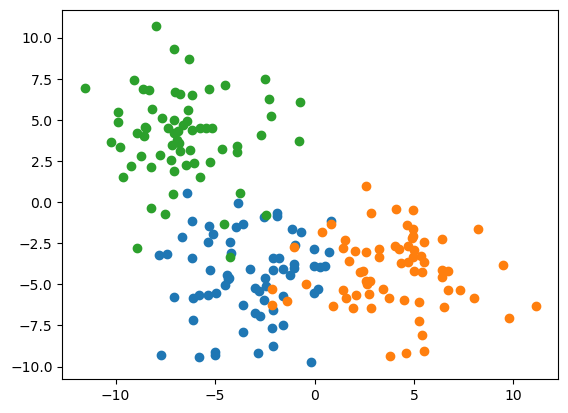

In [21]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=200, centers=3, cluster_std=2.5)

# plot the dataset
# plt.scatter(X[:,0],X[:,1],c=y) this is the same as the following three lines
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

# # 3d blob plot
# from mpl_toolkits import mplot3d
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(X[:,0],X[:,1],X[:,2],c=y)

In [22]:
# plot classification regions
def draw_classification_regions(X,y,model):
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .1
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    ax.set_xlabel(feature_names[0], fontsize=15)
    ax.set_ylabel(feature_names[1], fontsize=15)

    ax.legend()

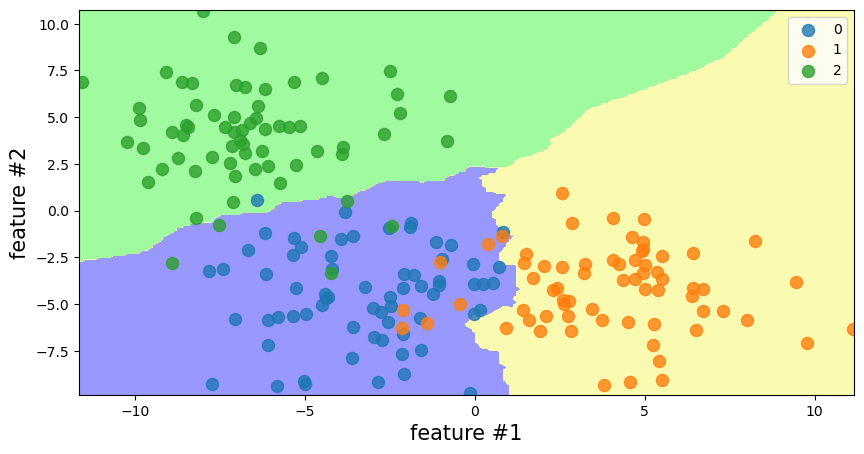

In [25]:
knn_blob = KNN(n_neighbors=8)
knn_blob.fit(X,y)
draw_classification_regions(X,y,knn_blob)

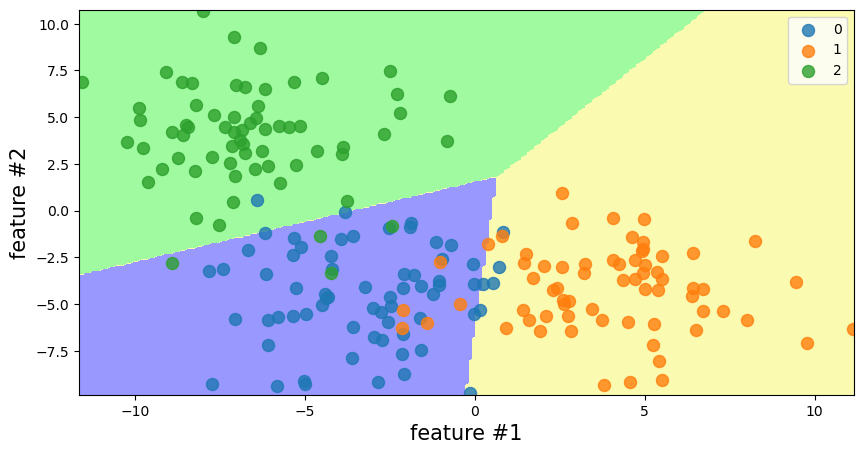

In [28]:
# logistic regression is a linear classifier (classification boundaries are lines in 2d, planes and hyperplanes in higher dimensions)
log_reg = LogisticRegression()
log_reg.fit(X,y)
draw_classification_regions(X,y,log_reg)

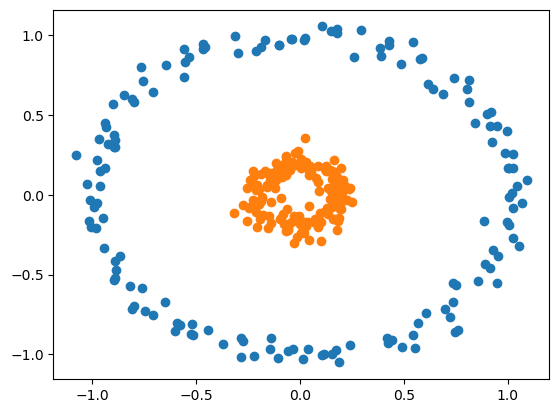

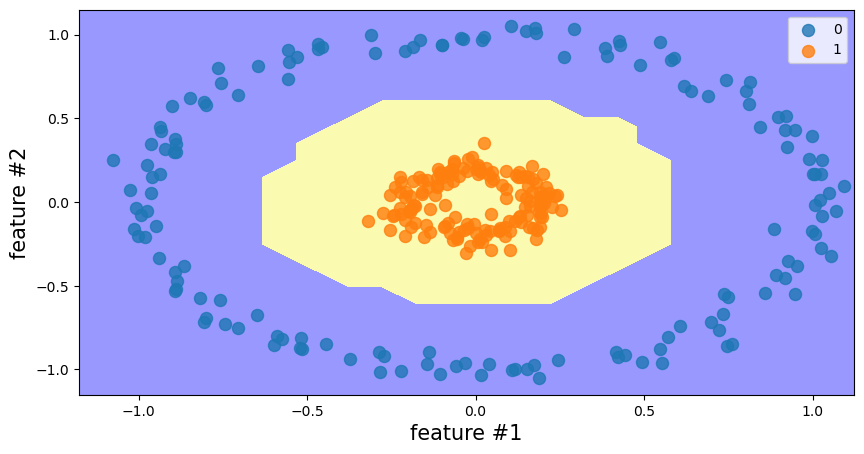

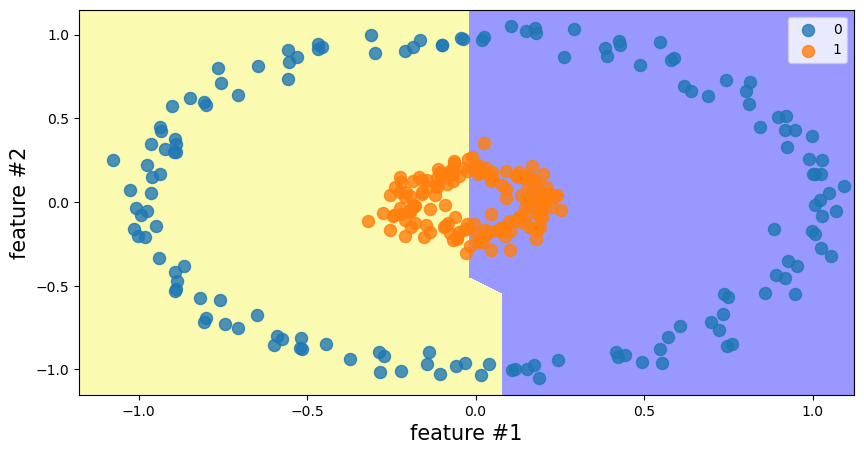

In [44]:
# two-circles dataset
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=300, noise=0.05, factor=0.2)

# plot the dataset
plt.scatter(X[y==0,0],X[y==0,1]) # when label y = 0, plot the corresponding X values, column 0 and column 1
plt.scatter(X[y==1,0],X[y==1,1]) # when label y = 1, plot the corresponding X values, column 0 and column 1

# plot classification regions
knn_circles = KNN(n_neighbors=10)
knn_circles.fit(X,y)
log_reg.fit(X,y)
draw_classification_regions(X,y,knn_circles)
draw_classification_regions(X,y,log_reg)